<a href="https://colab.research.google.com/github/vdadithya2002/Autonomous_Systems/blob/main/AutonomousSystems_class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXperiment 1##


In [14]:
!pip install control

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [16]:
num = [1]
den = [1,10,20]
plant = ctrl.TransferFunction(num,den)

In [27]:
Kp = 100
p_controller = Kp

In [28]:
P_system = ctrl.feedback(p_controller * plant , 1)

In [29]:
t = np.linspace(0,2,1000)
setpoint = 45
initial_value = 5
t1, y1 = ctrl.step_response(P_system * (setpoint - initial_value) + initial_value, t)

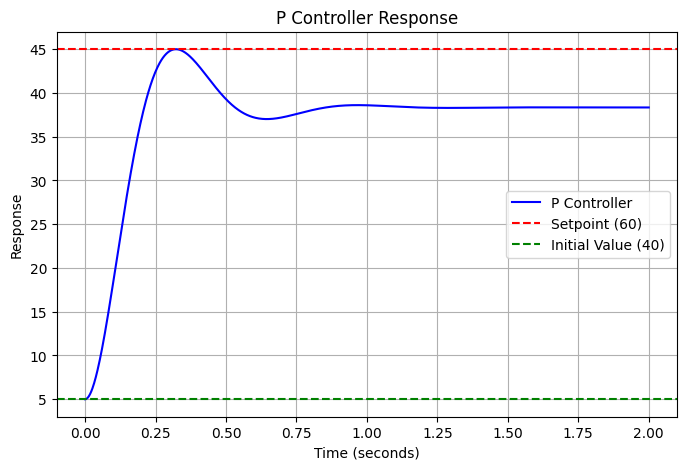

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(t1, y1, label="P Controller", color='b')
plt.axhline(setpoint, color='r', linestyle='--', label="Setpoint (60)")
plt.axhline(initial_value, color='g', linestyle='--', label="Initial Value (40)")
plt.xlabel("Time (seconds)")
plt.ylabel("Response")
plt.title("P Controller Response")
plt.legend()
plt.grid()
plt.show()


##EXperiment 2##

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [40]:
kp = 100
ki = 200
PI_controller = ctrl.TransferFunction([kp,ki], [1,0])


In [41]:
PI_system = ctrl.feedback(PI_controller * plant, 1)


In [42]:
t2, y2 = ctrl.step_response(PI_system * (setpoint - initial_value) + initial_value, t)


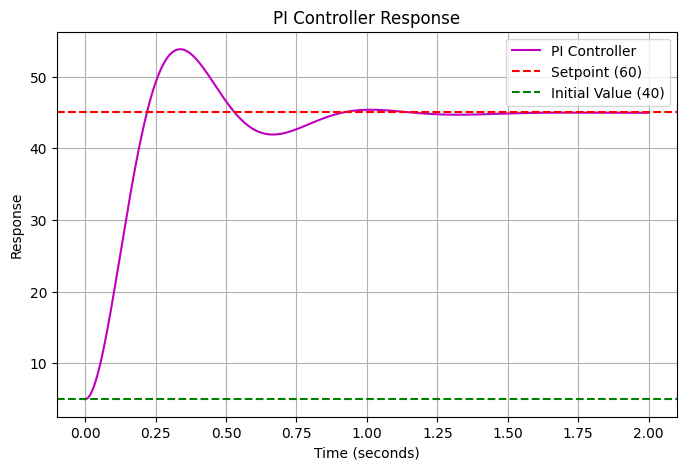

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(t2, y2, label="PI Controller", color='m')
plt.axhline(setpoint, color='r', linestyle='--', label="Setpoint (60)")
plt.axhline(initial_value, color='g', linestyle='--', label="Initial Value (40)")
plt.xlabel("Time (seconds)")
plt.ylabel("Response")
plt.title("PI Controller Response")
plt.legend()
plt.grid()
plt.show()


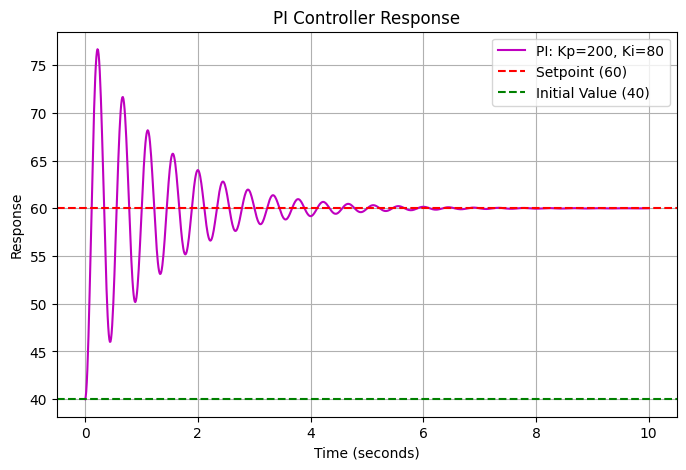

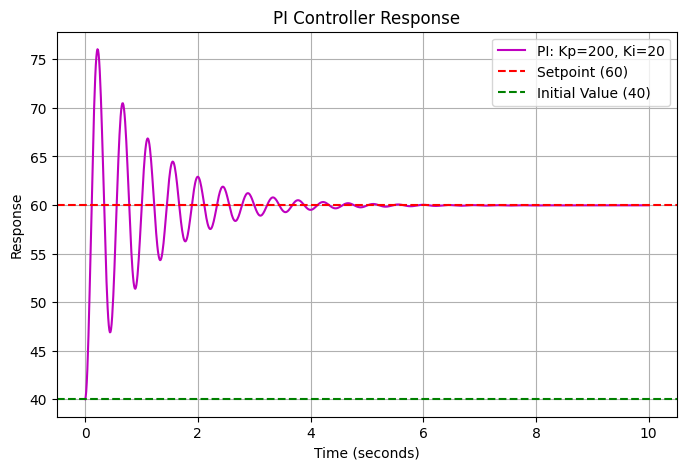

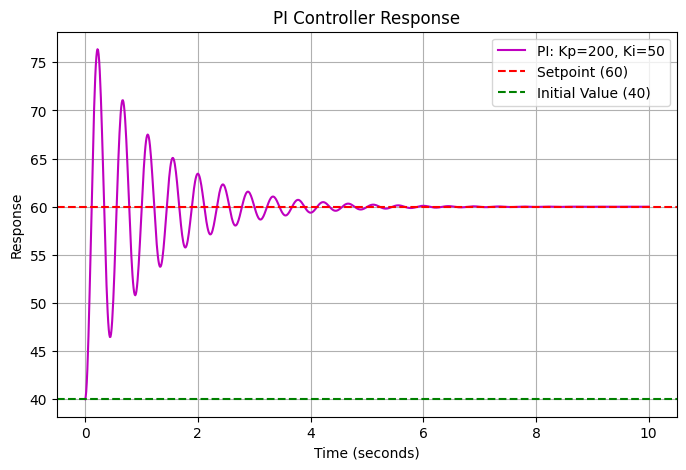

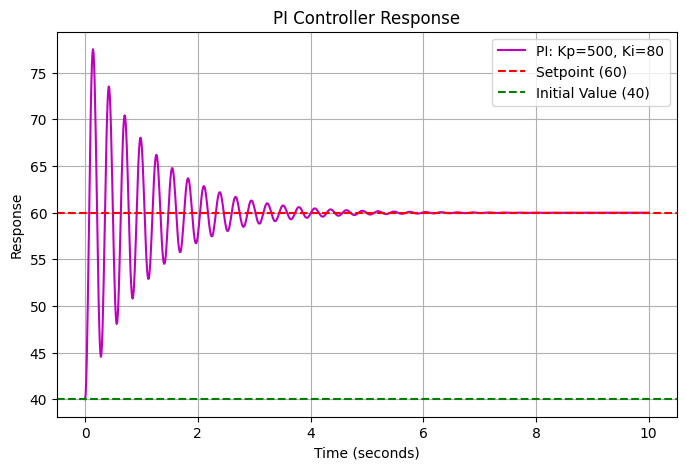

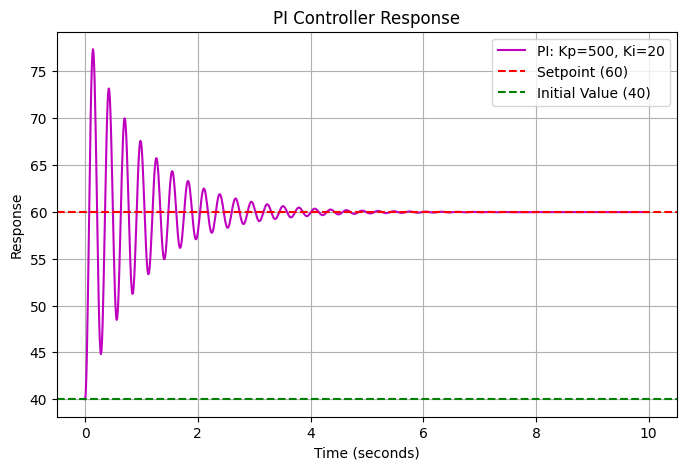

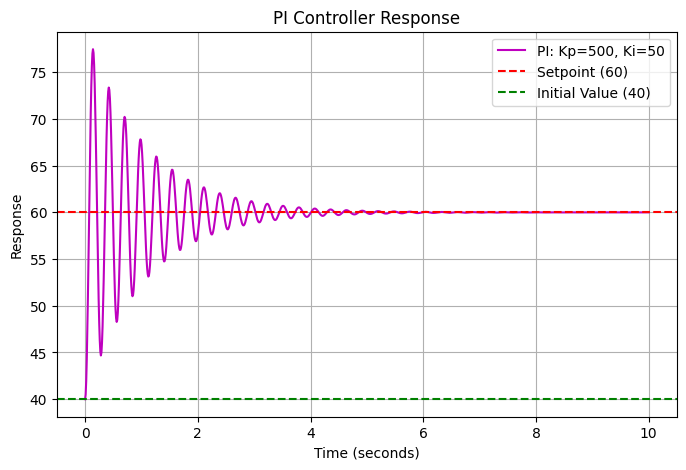

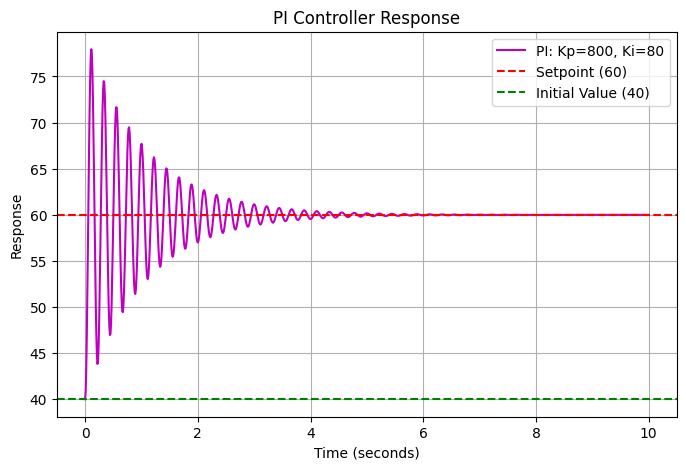

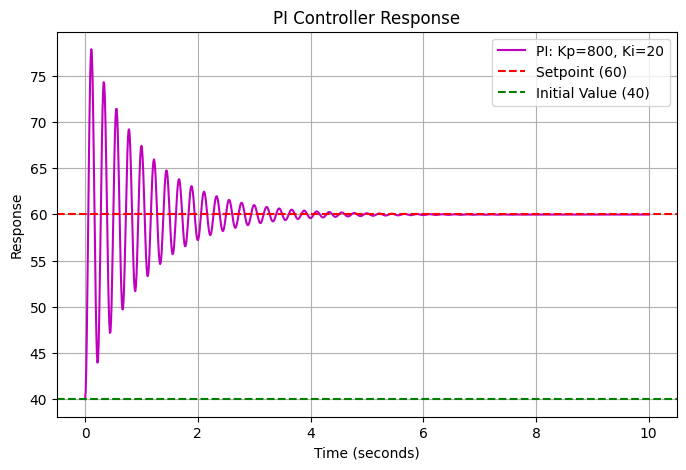

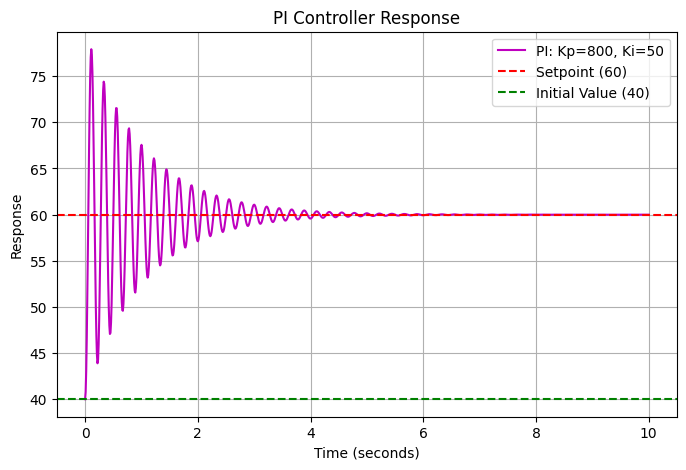

In [44]:
import matplotlib.pyplot as plt
import control as ctrl
import numpy as np

# Example plant (replace with your actual plant)
plant = ctrl.TransferFunction([1], [1, 2, 1])

# Gains
Kp = [200, 500, 800]  # Proportional gain
Ki = [80, 20, 50]     # Integral gain

# Time vector
t = np.linspace(0, 10, 1000)
setpoint = 60
initial_value = 40

for i in Kp:
    for j in Ki:
        # PI controller: (Kp*s + Ki) / s
        PI_controller = ctrl.TransferFunction([i, j], [1, 0])
        PI_system = ctrl.feedback(PI_controller * plant, 1)

        # Step response
        t2, y2 = ctrl.step_response(PI_system, t)

        # Scale to match setpoint/initial
        y2 = y2 * (setpoint - initial_value) + initial_value

        plt.figure(figsize=(8, 5))
        plt.plot(t2, y2, label=f"PI: Kp={i}, Ki={j}", color='m')
        plt.axhline(setpoint, color='r', linestyle='--', label="Setpoint (60)")
        plt.axhline(initial_value, color='g', linestyle='--', label="Initial Value (40)")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Response")
        plt.title("PI Controller Response")
        plt.legend()
        plt.grid()
        plt.show()


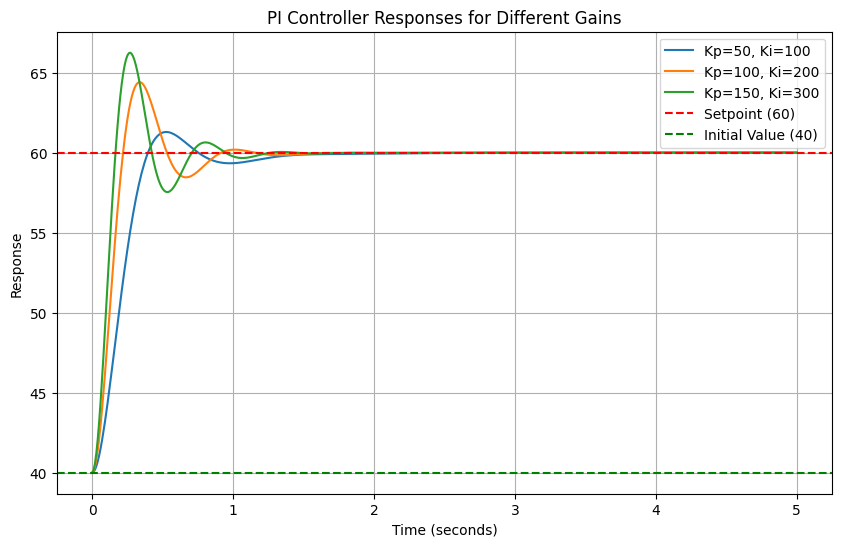

In [45]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Example plant (replace with your own system)
plant = ctrl.TransferFunction([1], [1, 10, 20])

# Time vector for simulation
t = np.linspace(0, 5, 500)

# Setpoint and initial value
setpoint = 60
initial_value = 40

# Lists of Kp and Ki values to try
Kp_values = [50, 100, 150]
Ki_values = [100, 200, 300]

plt.figure(figsize=(10, 6))

for Kp, Ki in zip(Kp_values, Ki_values):
    # Define PI controller
    PI_controller = ctrl.TransferFunction([Kp, Ki], [1, 0])

    # Closed-loop system with unity feedback
    PI_system = ctrl.feedback(PI_controller * plant, 1)

    # Step response to a unit step
    t2, y2 = ctrl.step_response(PI_system, t)

    # Scale the output to simulate step from initial_value to setpoint
    y2 = y2 * (setpoint - initial_value) + initial_value

    # Plot the response
    plt.plot(t2, y2, label=f'Kp={Kp}, Ki={Ki}')

# Plot setpoint and initial value lines
plt.axhline(setpoint, color='r', linestyle='--', label="Setpoint (60)")
plt.axhline(initial_value, color='g', linestyle='--', label="Initial Value (40)")

plt.xlabel("Time (seconds)")
plt.ylabel("Response")
plt.title("PI Controller Responses for Different Gains")
plt.legend()
plt.grid(True)
plt.show()


##EXPERIMENT 3##

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [62]:
kd = 10
pd_controller = ctrl.TransferFunction([kp,kd], [1])
PD_system = ctrl.feedback(pd_controller * plant, 1)
t3,y3 = ctrl.step_response(PD_system * (setpoint - initial_value) + initial_value, t)

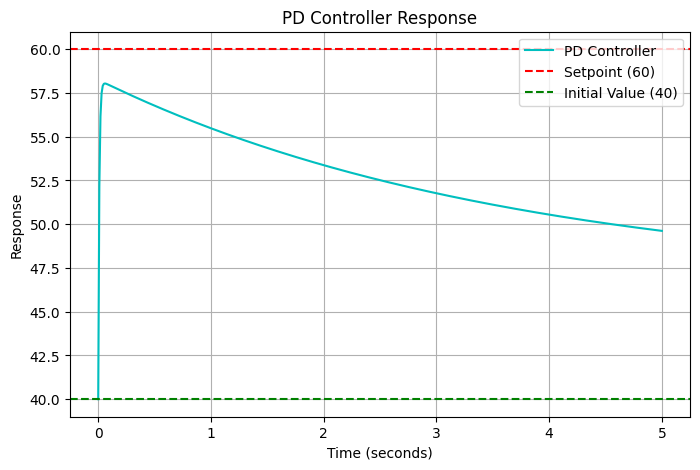

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(t3, y3, label="PD Controller", color='c')
plt.axhline(setpoint, color='r', linestyle='--', label="Setpoint (60)")
plt.axhline(initial_value, color='g', linestyle='--', label="Initial Value (40)")
plt.xlabel("Time (seconds)")
plt.ylabel("Response")
plt.title("PD Controller Response")
plt.legend()
plt.grid()
plt.show()


##EXPERIMENT 4###

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl


In [69]:
kp = 100
kd = 200
ki = 300
PID_controller = ctrl.TransferFunction([kp,kd,ki],[1,0])

In [70]:
PID_system = ctrl.feedback(PID_controller * plant, 1)

In [71]:
t4, y4 = ctrl.step_response(PID_system * (setpoint - initial_value) + initial_value, t)

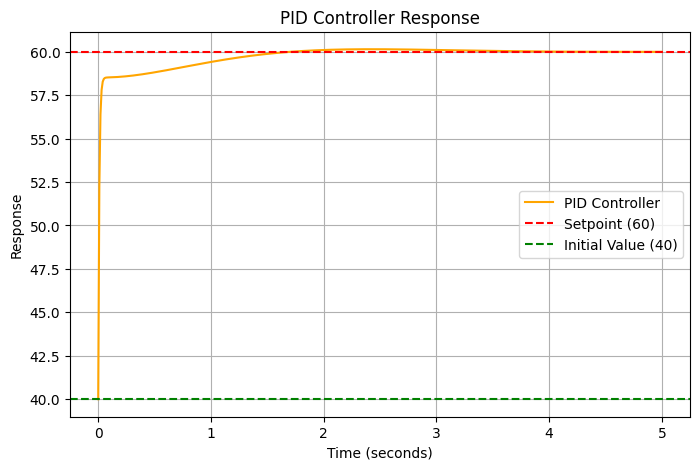

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(t4, y4, label="PID Controller", color='orange')
plt.axhline(setpoint, color='r', linestyle='--', label="Setpoint (60)")
plt.axhline(initial_value, color='g', linestyle='--', label="Initial Value (40)")
plt.xlabel("Time (seconds)")
plt.ylabel("Response")
plt.title("PID Controller Response")
plt.legend()
plt.grid()
plt.show()
